Importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random .set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loding the MNIST data from keras dataset


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist .load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data 60000 Images and test data 10000 images

*  Images dimension ->28 * 28




In [5]:
# priting the 10th imgaes
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


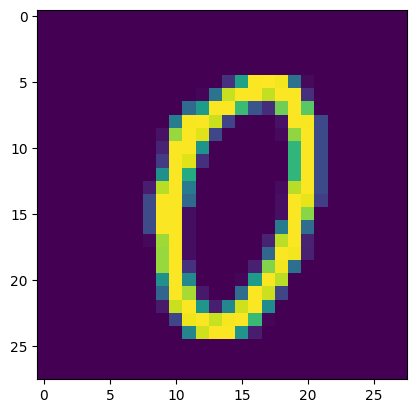

In [7]:
# displaying the images
plt.imshow(X_train[1000])
plt.show()

In [8]:
# print the corrsponding label
print(Y_train[1000])

0


In [9]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [10]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Apply the Onehot encoding

All images ar esame dimesions in this dataset If not , we have to resize all the images to comman dimension

In [11]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

In [12]:
# priting the 10th imgaes
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Bulinding the Neural Network

In [13]:
# setting the Layers of the Newural Network
modle = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# compling the neural network
modle.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# trainins and testing the Neural Network
modle.fit(X_train,Y_train,epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8704 - loss: 0.4562
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9583 - loss: 0.1411
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9723 - loss: 0.0924
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9800 - loss: 0.0677
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9854 - loss: 0.0516
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0404
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0319
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9938 - loss: 0.0252
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9952 - loss: 0.0209
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9959 - loss: 0.0172


Trainig data Accuracy =99.58

Accuracy on test data

In [16]:
loss,accuracy = modle.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9723 - loss: 0.1039
0.9757999777793884


Test data accuaracy =97.5

In [17]:
print(X_test.shape)

(10000, 28, 28)


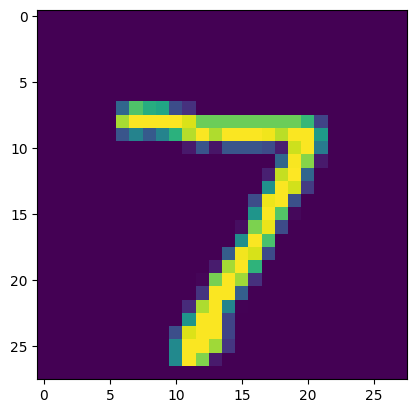

In [18]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred = modle.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
print(Y_pred[0])

[2.7239081e-04 1.7722501e-08 4.9453555e-04 9.8916882e-01 1.0227066e-09
 1.5830668e-03 8.0240807e-11 9.9998492e-01 3.3319336e-03 4.7307459e-01]


Model.pred() gives the prediction of each class for that data point

In [23]:
# converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [24]:
# converting the prediction probabilities to class labelfor all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_pred_labels -> ,Y_test true tables

Confusion Matrix

In [26]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 968    0    0    0    1    0    6    0    3    2]
 [   1 1119    2    5    0    0    2    1    5    0]
 [   4    1  996   11    2    1    4    3   10    0]
 [   0    0    0  996    0    1    0    6    2    5]
 [   0    0    1    1  965    0    8    2    0    5]
 [   1    0    0   21    2  850    7    2    4    5]
 [   3    2    1    1    1    4  945    0    1    0]
 [   0    3    6    2    4    0    0 1006    0    7]
 [   3    0    3   12    7    3    2    3  936    5]
 [   3    3    0    5   15    3    0    1    2  977]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

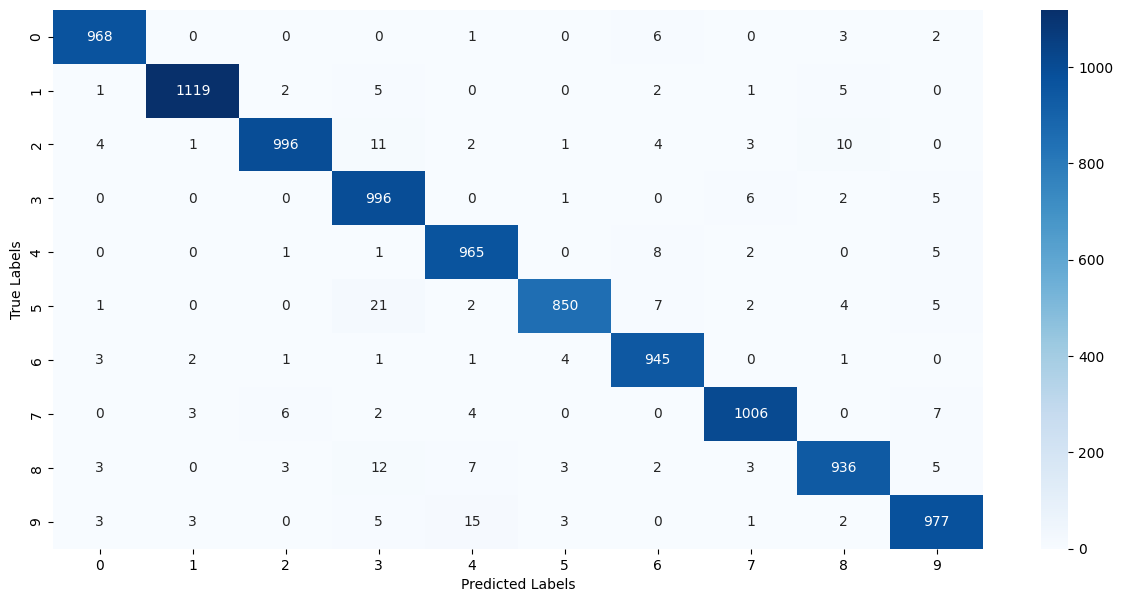

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

bulidign the predictive system

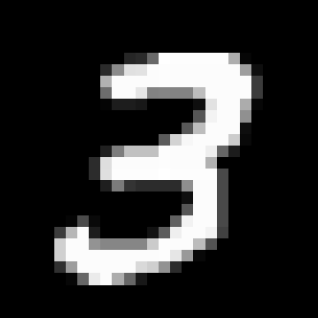

In [34]:
input_image_path='/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

In [35]:
type(input_image)

numpy.ndarray

In [37]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [38]:
print(input_image.shape)

(318, 318, 3)


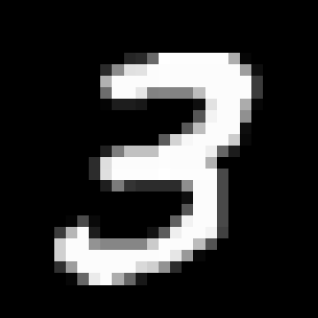

In [40]:
grayscale_image=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale_image)

In [41]:
grayscale_image.shape

(318, 318)

In [42]:
input_image_resize=cv2.resize(grayscale_image,(28,28))
cv2_imshow(input_image_resize)

In [43]:
input_image_resize.shape

(28, 28)

In [44]:
input_image_resize=input_image_resize/255

In [45]:
input_image_resize=input_image_resize.reshape(1,28,28)

In [46]:
type(input_image_resize)

numpy.ndarray

In [47]:
input_prediction=modle.predict(input_image_resize)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[2.8074141e-09 5.7485897e-07 7.0768956e-06 1.0000000e+00 5.2083530e-17
  4.1941676e-04 3.5871630e-17 1.8356525e-06 6.2308030e-04 9.9226987e-01]]


In [48]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

3


**predictive System**

Enter the path of the image to be predicted:/content/MNIST_digit.png


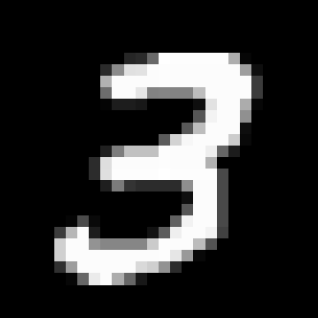

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The Handwritten Digit is recognised as 3


In [50]:
input_image_path=input('Enter the path of the image to be predicted:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

grayscale_image=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale_image,(28,28))
input_image_resize=input_image_resize/255
input_image_resize=input_image_resize.reshape(1,28,28)
input_prediction=modle.predict(input_image_resize)
input_pred_label=np.argmax(input_prediction)
print('The Handwritten Digit is recognised as',input_pred_label)